# image segmentation

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

# Path to the image file
imagePath = '/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/train/'

# Path to the JSON annotation file
annotation_file = '/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/train/_annotations.coco.json'


with open(annotation_file, 'r') as json_file:
    annotation_data = json.load(json_file)


In [ ]:
print(" categories in images ")
for i in annotation_data['categories']:
  print("id:",i['id'], ', class name:',i['name'])


 categories in images 
id: 0 , class name: rice-plant-diseases
id: 1 , class name: Bacterial-leaf
id: 2 , class name: Brown-Spot
id: 3 , class name: Leaf-Smut


In [ ]:
data_annotations = annotation_data['annotations']

In [ ]:
grouped_data = {}

for entry in data_annotations:
    category_id = entry["category_id"]

    # Check if the category_id already exists in the dictionary
    if category_id in grouped_data:
        grouped_data[category_id].append(entry)
    else:
        grouped_data[category_id] = [entry]

# Print the grouped data
# for category_id, category_entries in grouped_data.items():
#     print(f"Category {category_id}:")
#     for entry in category_entries:
#         print(entry)

In [ ]:
keys = [1, 2, 3]
imagesID_category = {key: [] for key in keys}
for entry in grouped_data[1]:
    imagesid = entry["image_id"]
    imagesID_category[1].append(imagesid)
for entry in grouped_data[2]:
    imagesid = entry["image_id"]
    imagesID_category[2].append(imagesid)
for entry in grouped_data[3]:
    imagesid = entry["image_id"]
    imagesID_category[3].append(imagesid)



In [ ]:
print(" len of class 1 in train data:" ,len(np.unique(imagesID_category[1])))
print(" len of class 2 in train data:",len(np.unique(imagesID_category[2])))
print(" len of class 3 in train data:",len(np.unique(imagesID_category[3])))

 len of class 1 in train data: 40
 len of class 2 in train data: 40
 len of class 3 in train data: 40


Balanced class of images in the training set

In [ ]:
class1 = list(np.unique(imagesID_category[1]))
class2 = list(np.unique(imagesID_category[2]))
class3 = list(np.unique(imagesID_category[3]))

##### splitting image id for train and val for balanced split

In [ ]:
import random
random.shuffle(class1)
random.shuffle(class2)
random.shuffle(class3)
class1test, class1 = class1[:10], class1[10:]
class2test, class2 = class2[:10], class2[10:]
class3test, class3 = class3[:10], class3[10:]

trainIDs =class1 +class2 +class3
testIDs = class1test +class2test +class3test

In [ ]:
len(trainIDs)

90

In [ ]:
import shutil
for entry in data_annotations:
    I_id = entry["image_id"]
    if I_id in trainIDs:
      file_nametrain = next((image["file_name"] for image in annotation_data["images"] if image["id"] == I_id), None)
      shutil.copy('/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/train/'+file_nametrain, '/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/trainData/')
    elif I_id in testIDs:
      file_nametest = next((image["file_name"] for image in annotation_data["images"] if image["id"] == I_id), None)
      shutil.copy('/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/train/'+file_nametest, '/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/testData/')



##### Changing annotation file

In [ ]:
filtered_listImageTrain = [d for d in annotation_data['images'] if d['id'] in trainIDs]
filtered_listAnnotTrain = [d for d in annotation_data['annotations'] if d['image_id'] in trainIDs]

filtered_listImageTest = [d for d in annotation_data['images'] if d['id'] in testIDs]
filtered_listAnnotTest = [d for d in annotation_data['annotations'] if d['image_id'] in testIDs]

In [ ]:
annotation_data['categories']

[{'id': 0, 'name': 'rice-plant-diseases', 'supercategory': 'none'},
 {'id': 1, 'name': 'Bacterial-leaf', 'supercategory': 'rice-plant-diseases'},
 {'id': 2, 'name': 'Brown-Spot', 'supercategory': 'rice-plant-diseases'},
 {'id': 3, 'name': 'Leaf-Smut', 'supercategory': 'rice-plant-diseases'}]

In [ ]:
for item in annotation_data['categories']:
    if item['id'] == 0:
        annotation_data['categories'].remove(item)
        break

In [ ]:
annotation_data['categories']

[{'id': 1, 'name': 'Bacterial-leaf', 'supercategory': 'rice-plant-diseases'},
 {'id': 2, 'name': 'Brown-Spot', 'supercategory': 'rice-plant-diseases'},
 {'id': 3, 'name': 'Leaf-Smut', 'supercategory': 'rice-plant-diseases'}]

In [ ]:
TrainAnnot = annotation_data.copy()
TestAnnot = annotation_data.copy()

### viewing random images from the dataset

In [ ]:
print(len(TrainAnnot['images']))
print(len(TrainAnnot['annotations']))
TrainAnnot['images'] = filtered_listImageTrain
TrainAnnot['annotations'] = filtered_listAnnotTrain
print(len(TrainAnnot['images']))
print(len(TrainAnnot['annotations']))

print("\n")
print(len(TestAnnot['images']))
print(len(TestAnnot['annotations']))
TestAnnot['images'] = filtered_listImageTest
TestAnnot['annotations'] = filtered_listAnnotTest
print(len(TestAnnot['images']))
print(len(TestAnnot['annotations']))


120
666
90
447


120
666
30
219


In [ ]:
file_pathTrain = "/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/trainData/trainAnnot.coco.json"
with open(file_pathTrain, 'w') as json_file:
    json.dump(TrainAnnot, json_file)

file_pathTest = "/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/testData/testAnnot.coco.json"
with open(file_pathTest, 'w') as json_file:
    json.dump(TestAnnot, json_file)

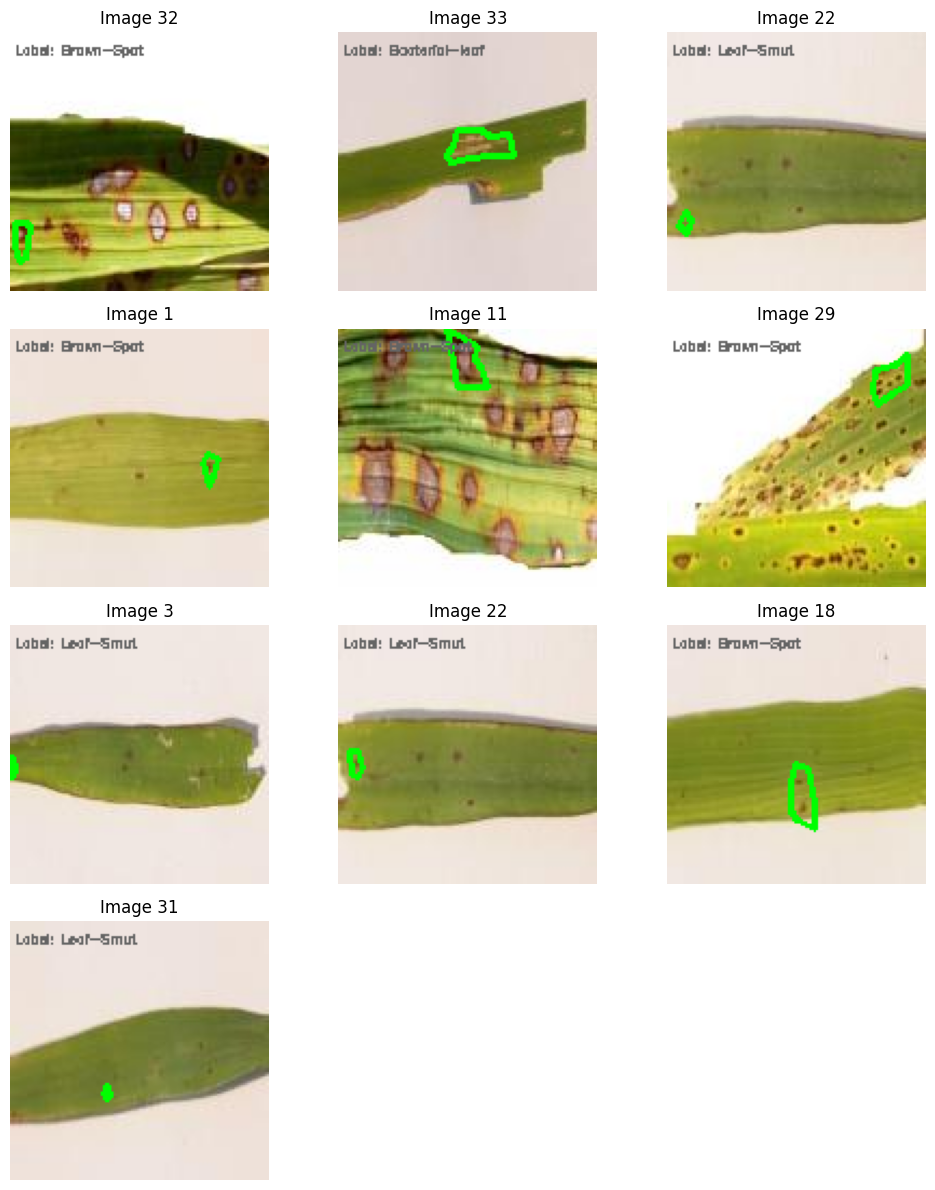

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

num_images = len(annotation_data['images'])
random_indices = random.sample(range(num_images), 10)
num_cols = 3
num_rows = (10 + num_cols - 1) // num_cols
plt.figure(figsize=(10, 12))


for j,i in enumerate(random_indices):

    image_id = annotation_data['annotations'][i]['image_id']
    images = annotation_data['images'][i]
    data_list =annotation_data['images']
    selected_item = next((item for item in data_list if item['id'] == image_id), None)
    selected_path = selected_item['file_name']

    image_path = imagePath+selected_path
    image = cv2.imread(image_path)

    points = annotation_data['annotations'][i]['segmentation']

    for segmentation_points in points:
        segmentation_points = [int(x) for x in segmentation_points]  # Convert to integers
        segmentation_points = np.array(segmentation_points).reshape(-1, 2)
        cv2.polylines(image, [segmentation_points], isClosed=True, color=(0, 255, 0), thickness=2)  # Green polygon

    labelid = annotation_data['annotations'][i]['category_id']
    label=next(item for item in annotation_data['categories'] if item['id'] == labelid)['name']
    label_text = f'Label: {label}'
    cv2.putText(image, label_text, (2, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (100, 100, 100), 1,)

    # # Display the image with the segmentation
    plt.subplot(num_rows, num_cols, j + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {image_id}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Using Detectron for image segmentation

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.5 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44089 sha256=f08a95dedbd38dd220903e7926d42cd6cdfb7c95f42be83e0e44ff18de8fd55a
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependen

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-8l14w27p
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-8l14w27p
  Resolved https://github.com/facebookresearch/detectron2.git to commit fc9c33b1f6e5d4c37bbb46dde19af41afc1ddb2a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("leaf_dataset_train", {}, "/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/trainData/trainAnnot.coco.json", "/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/trainData")
register_coco_instances("leaf_dataset_val", {}, "/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/testData/testAnnot.coco.json", "/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/testData")
# register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

AssertionError: ignored

In [ ]:
# from detectron2.data import DatasetCatalog, MetadataCatalog

# # Unregister the dataset if it's already registered
# if "leaf_dataset_train" in DatasetCatalog.list():
#     DatasetCatalog.remove("leaf_dataset_train")
#     MetadataCatalog.remove("leaf_dataset_train")

# # Unregister the dataset if it's already registered
# if "leaf_dataset_val" in DatasetCatalog.list():
#     DatasetCatalog.remove("leaf_dataset_val")
#     MetadataCatalog.remove("leaf_dataset_val")

[09/10 14:08:29 d2.data.datasets.coco]: Loaded 90 images in COCO format from /content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/trainData/trainAnnot.coco.json


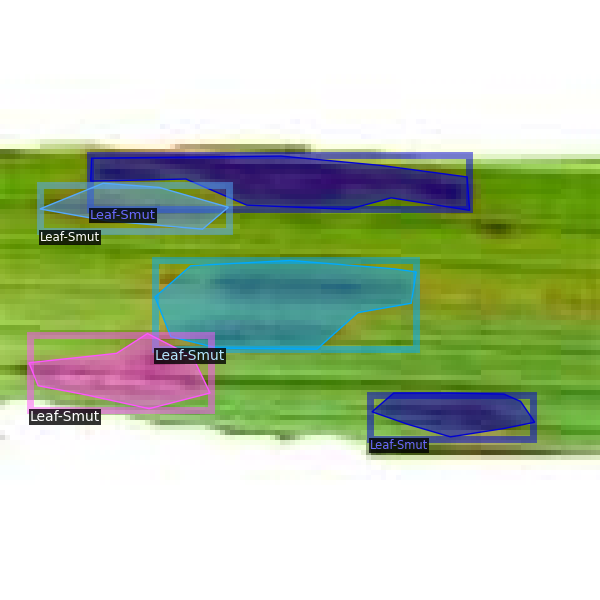

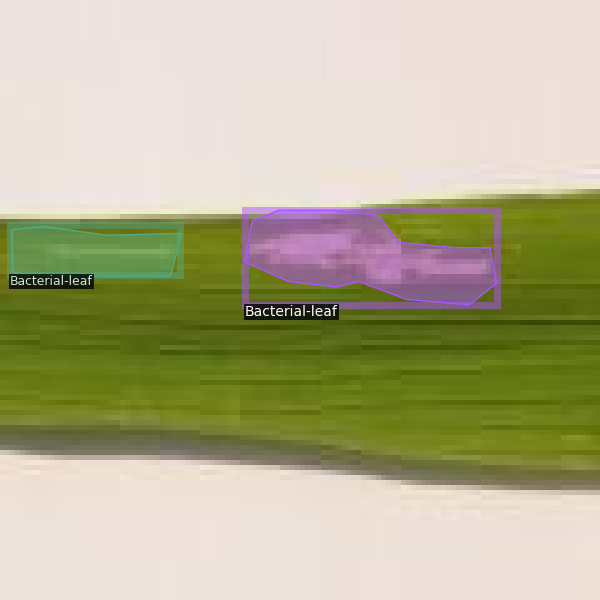

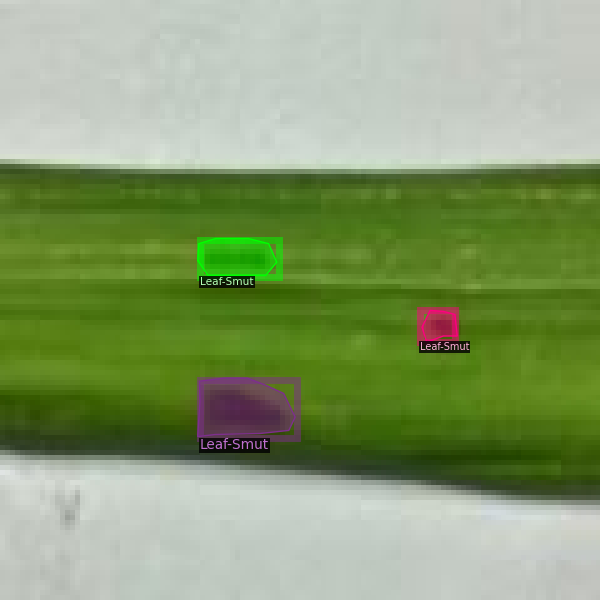

In [ ]:
my_dataset_train_metadata = MetadataCatalog.get("leaf_dataset_train")
dataset_dicts = DatasetCatalog.get("leaf_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
from detectron2.engine import DefaultTrainer
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("leaf_dataset_train",)
cfg.DATASETS.TEST = ("leaf_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


# cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1000 #adjust up if val mAP is still rising, adjust down if overfit
# cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3

cfg.TEST.EVAL_PERIOD = 500

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/10 14:10:51 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/10 14:10:51 d2.engine.train_loop]: Starting training from iteration 0
[09/10 14:11:05 d2.utils.events]:  eta: 0:11:00  iter: 19  total_loss: 3.149  loss_cls: 1.397  loss_box_reg: 0.5533  loss_mask: 0.6929  loss_rpn_cls: 0.4518  loss_rpn_loc: 0.05403    time: 0.6749  last_time: 0.7209  data_time: 0.0375  last_data_time: 0.0291   lr: 1.9981e-05  max_mem: 4336M
[09/10 14:11:19 d2.utils.events]:  eta: 0:11:29  iter: 39  total_loss: 2.615  loss_cls: 0.9824  loss_box_reg: 0.5921  loss_mask: 0.6904  loss_rpn_cls: 0.2726  loss_rpn_loc: 0.05028    time: 0.7002  last_time: 0.6892  data_time: 0.0245  last_data_time: 0.0159   lr: 3.9961e-05  max_mem: 4336M
[09/10 14:11:34 d2.utils.events]:  eta: 0:11:19  iter: 59  total_loss: 2.336  loss_cls: 0.7055  loss_box_reg: 0.6784  loss_mask: 0.6847  loss_rpn_cls: 0.1518  loss_rpn_loc: 0.05075    time: 0.7027  last_time: 0.7419  data_time: 0.0231  last_data_time: 0.0104   lr: 5.9941e-05  max_mem: 4336M
[09/10 14:11:48 d2.utils.events]:  eta: 0:11:04  it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[09/10 14:16:47 d2.evaluation.evaluator]: Inference done 11/30. Dataloading: 0.0061 s/iter. Inference: 0.0936 s/iter. Eval: 0.0047 s/iter. Total: 0.1043 s/iter. ETA=0:00:01
[09/10 14:16:49 d2.evaluation.evaluator]: Total inference time: 0:00:02.705640 (0.108226 s / iter per device, on 1 devices)
[09/10 14:16:49 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.092473 s / iter per device, on 1 devices)
[09/10 14:16:49 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/10 14:16:49 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[09/10 14:16:49 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/10 14:16:49 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/10 14:16:49 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.02 seconds.
[09/10 14:16:49 d2.evaluation

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[09/10 14:22:48 d2.evaluation.evaluator]: Inference done 11/30. Dataloading: 0.0111 s/iter. Inference: 0.0855 s/iter. Eval: 0.0026 s/iter. Total: 0.0992 s/iter. ETA=0:00:01
[09/10 14:22:50 d2.evaluation.evaluator]: Total inference time: 0:00:02.543364 (0.101735 s / iter per device, on 1 devices)
[09/10 14:22:50 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.086445 s / iter per device, on 1 devices)
[09/10 14:22:50 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/10 14:22:50 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[09/10 14:22:50 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/10 14:22:50 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/10 14:22:50 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[09/10 14:22:50 d2.evaluation

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

[09/10 14:24:02 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [ ]:
#saving trained model weights
shutil.copy('./output/model_final.pth', '/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/')

'/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/model_final.pth'

In [ ]:

file_size_bytes = os.path.getsize(cfg.MODEL.WEIGHTS)
file_size_mb = file_size_bytes / (1024 * 1024)

print(f"The size of  is {file_size_mb:.2f} MB")

The size of  is 334.84 MB


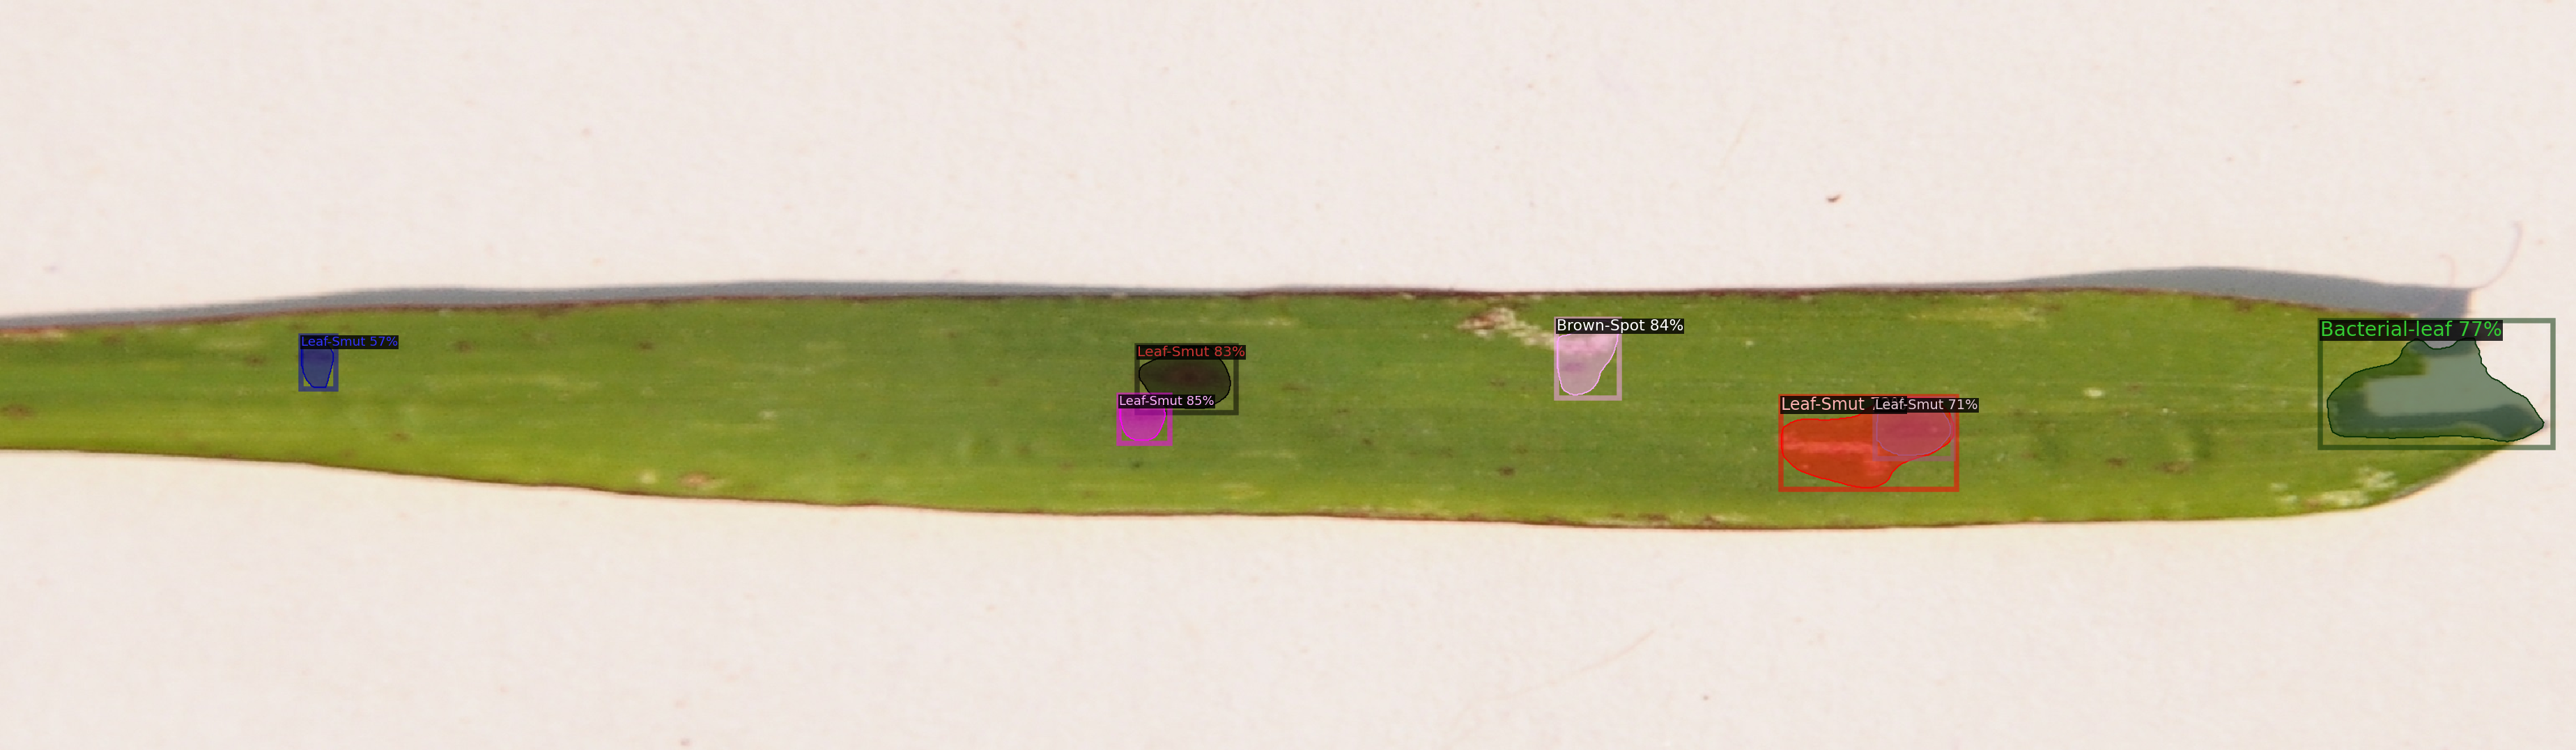

In [ ]:

from google.colab.patches import cv2_imshow
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])



In [ ]:
from collections import Counter
folder_path = "/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/train"
files = os.listdir(folder_path)
image_extensions = [".jpg", ".jpeg", "JPG"]
image_files = [file for file in files if os.path.splitext(file)[-1].lower() in image_extensions]

Rpath = "/content/drive/MyDrive/chisquareX/InstanceSegmentation.v1i.coco/results/"

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    outputs = predictor(image)
    classes = outputs['instances'].pred_classes
    tensor = torch.tensor(classes)
    classes = tensor.tolist()
    most_repeating_class = [item for item, count in Counter(classes).items() if count == max(Counter(classes).values())]
    print(most_repeating_class)

    v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    OUT = v.get_image()[:, :, ::-1]
    if not most_repeating_class:
      print("none in class")
    else:
      most_repeating_class = int(most_repeating_class[0])
    if most_repeating_class==0:
      output_file = os.path.join(Rpath+'bacterial/', image_file)
      cv2.imwrite(output_file, OUT)
    elif most_repeating_class==1:
      output_file = os.path.join(Rpath+'brownspot/', image_file)
      cv2.imwrite(output_file, OUT)
    elif most_repeating_class==2:
      output_file = os.path.join(Rpath+'leafsmut/', image_file)
      cv2.imwrite(output_file, OUT)





<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[0, 1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[]
none in class
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[0]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[0]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[2]
[2]


<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)
<ipython-input-188-1ece32f92871>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(classes)


[1, 2]
[2]


# Results :image segmentation folder

https://drive.google.com/drive/folders/1reQZPK1Yk3BIAqxvq5JIF55Bas7FXZkm?usp=drive_link

## project folder

https://drive.google.com/drive/folders/1tXFq4JT6zgyHPm88-1uUaTGDPySfMcPh?usp=sharing